<div style="float: right; margin: 20px 20px 20px 20px"><img src="images/bro.png" width="100px"></div>

# Bro Network Data to Plotting
Yes, this is provincial, but going from a Bro log to a visual data plot in a few lines of code might be really handy sometimes. So without further ado here's a very small bit of code :)

<div style="float: right; margin: 30px -100px 0px 0px"><img src="images/matplotlib.png" width="300px"></div>

### Software
- Bro Analysis Tools (BAT): https://github.com/Kitware/bat
- Pandas: https://github.com/pandas-dev/pandas
- Matplotlib: https://matplotlib.org

## Quickly go from Bro log to Pandas DataFrame

In [10]:
from bat.log_to_dataframe import LogToDataFrame
from bat.utils import plot_utils

# Just some plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
plot_utils.plot_defaults()

# Convert it to a Pandas DataFrame
http_df = LogToDataFrame('../data/http.log')
http_df.head()

Successfully monitoring ../data/http.log...


,filename,host,id.orig_h,id.orig_p,id.resp_h,id.resp_p,info_code,info_msg,method,orig_fuids,...,resp_mime_types,response_body_len,status_code,status_msg,tags,trans_depth,uid,uri,user_agent,username
ts,,,,,,,,,,,,,,,,,,,,,
2013-09-15 17:44:27.668082,-,guyspy.com,192.168.33.10,1031,54.245.228.191,80,-,-,GET,-,...,text/html,184,301,Moved Permanently,(empty),1,CyIaMO7IheOh38Zsi,/,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,-
2013-09-15 17:44:27.731702,-,www.guyspy.com,192.168.33.10,1032,54.245.228.191,80,-,-,GET,-,...,text/html,100631,200,OK,(empty),1,CoyZrY2g74UvMMgp4a,/,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,-
2013-09-15 17:44:28.092922,-,www.guyspy.com,192.168.33.10,1032,54.245.228.191,80,-,-,GET,-,...,text/html,55817,404,Not Found,(empty),2,CoyZrY2g74UvMMgp4a,/wp-content/plugins/slider-pro/css/advanced-sl...,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,-
2013-09-15 17:44:28.150301,-,www.guyspy.com,192.168.33.10,1040,54.245.228.191,80,-,-,GET,-,...,text/plain,887,200,OK,(empty),1,CiCKTz4e0fkYYazBS3,/wp-content/plugins/contact-form-7/includes/cs...,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,-
2013-09-15 17:44:28.150602,-,www.guyspy.com,192.168.33.10,1041,54.245.228.191,80,-,-,GET,-,...,text/plain,10068,200,OK,(empty),1,C1YBkC1uuO9bzndRvh,/wp-content/plugins/slider-pro/css/slider/adva...,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,-


<div style="float: left; margin: 20px 20px 20px 20px"><img src="images/eyeball.jpeg" width="100px"></div>

## Lets look at our data
Above we used a BAT utility method to set up nice plotting defaults and here we simply use the plotting provided by Pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e2cfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1150aed30>]], dtype=object)

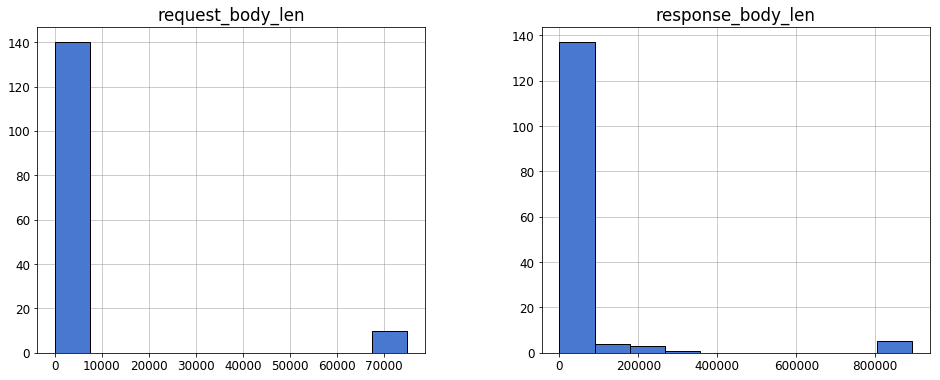

In [17]:
http_df[['request_body_len','response_body_len']].hist()

<div style="float: left; margin: 20px 20px 20px 20px"><img src="images/eyeball.jpeg" width="100px"></div>

## Lets look at our data again
Since BAT automatically makes the timestamp the index, we can plot volume over time super easy.

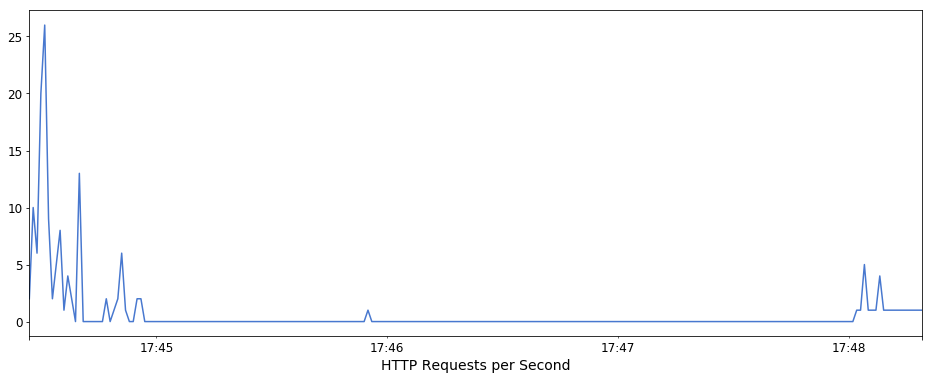

In [19]:
http_df['uid'].resample('1S').count().plot()
plt.xlabel('HTTP Requests per Second')

<div style="float: right; margin: 50px 0px 0px 0px"><img src="https://www.kitware.com/img/small_logo_over.png"></div>
## Wrap Up
Well that's it for this notebook, it was kinda simple but sometime you just want to know how to plot the darn thing. :)

If you liked this notebook please visit the [BAT](https://github.com/Kitware/bat) project for more notebooks and examples.